In [1]:
import pandas as pd
import numpy as np

In [2]:
# Veri Okuma
# Dosya "#" ile ayrılmış
df = pd.read_csv("data/input_50.csv", sep="#", engine="python")

# Başta boş bir kolon oluşmuşsa sil
if df.columns[0] == "":
    df = df.drop(df.columns[0], axis=1)


In [3]:
# Sütun İsimlerini Temizleme
df.columns = (
    df.columns.astype(str)
        .str.replace("#", "", regex=False)
        .str.strip()
)


In [4]:
#  -1 Değerlerini NaN Yapma

df = df.replace(-1, np.nan)

# Eksik değer kontrolü
missing = df.isna().sum().sort_values(ascending=False)
print("En çok eksik değere sahip sütunlar:")
print(missing.head(15))

En çok eksik değere sahip sütunlar:
URL_VIEW_TIME_5                         22608
URL_VIEW_TIME_4                         21973
URL_VIEW_TIME_3                         21179
URL_VIEW_TIME_2                         19901
QUIZ_CLOSE_ATTEMPT_TIME_2               19237
QUIZ_CLOSE_ATTEMPT_TIME_3               19237
QUIZ_ATTEMPT_TIME_3                     19018
QUIZ_ATTEMPT_TIME_2                     19018
ACCOMPLISH_OPTIONAL_PERCENTILE_GRADE    18286
ACCOMPLISH_OPTIONAL_GRADE               18286
NP_ACCOMPLISH_OPTIONAL_GRADE            18286
ACCOMPLISH_OPTIONAL                     18286
URL_VIEW_TIME_PCT                       18068
URL_VIEW_TIME_1                         18068
ACCOMPLISH_OPTIONAL_PCT_GRADED          18048
dtype: int64


In [ ]:
#  Hedef Değişkeni (TARGET) Seçimi

if "TARGET" in df.columns:
    target_col = "TARGET"
elif "BIN_TARGET" in df.columns:
    target_col = "BIN_TARGET"
elif "NP_TARGET" in df.columns:
    target_col = "NP_TARGET"
else:
    raise ValueError("TARGET bulunamadı!")

print("Seçilen hedef değişken:", target_col)
print(df[target_col].value_counts(dropna=False))

Seçilen hedef değişken: TARGET
TARGET
0.000000     3503
10.000000    1689
9.000000      393
8.000000      359
5.000000      305
             ... 
4.316667        1
1.388888        1
3.533333        1
4.544445        1
3.477778        1
Name: count, Length: 10954, dtype: int64


In [ ]:
#  Kullanılmayan Sütunları Silme

useless_cols = ["UID", "COURSE", "ALL_GRADES_PAST"]

for col in useless_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)


In [7]:
#  Aktivite Sütunlarını Seçme

activity_cols = [
    col for col in df.columns
    if (
        "TIME" in col.upper()
        or "PCT" in col.upper()
        or "VIEW" in col.upper()
        or "ATTEMPT" in col.upper()
        or "SUBMIT" in col.upper()
    )
    and col != target_col
]

In [8]:
# Aktivite Yok → NaN = 0
df[activity_cols] = df[activity_cols].fillna(0)


# PASS_FAIL Kolonu Oluşturma
# 5 ve üzeri = geçer (1), altı = kalır (0)
df["PASS_FAIL"] = (df[target_col] >= 5).astype(int)
print(df["PASS_FAIL"].value_counts())


# Temel Kontroller

print("Yeni veri şekli:", df.shape)
df.head()

PASS_FAIL
1    15309
0     9951
Name: count, dtype: int64
Yeni veri şekli: (25260, 69)


,Unnamed: 0,ACCOMPLISH_MANDATORY,ACCOMPLISH_MANDATORY_GRADE,ACCOMPLISH_MANDATORY_PCT_GRADED,ACCOMPLISH_MANDATORY_PERCENTILE_GRADE,ACCOMPLISH_OPTIONAL,ACCOMPLISH_OPTIONAL_GRADE,ACCOMPLISH_OPTIONAL_PCT_GRADED,ACCOMPLISH_OPTIONAL_PERCENTILE_GRADE,NP_ACCOMPLISH_MANDATORY_GRADE,...,QUIZ_ATTEMPT_UNIQUE_PCT,QUIZ_CLOSE_ATTEMPT_PCT,QUIZ_CLOSE_ATTEMPT_TIME_1,QUIZ_CLOSE_ATTEMPT_TIME_2,QUIZ_CLOSE_ATTEMPT_TIME_3,QUIZ_CLOSE_ATTEMPT_TIME_PCT,QUIZ_CLOSE_ATTEMPT_UNIQUE_PCT,FORUM_VIEW_FORUM_PCT,FORUM_VIEW_DISCUSSION_PCT,PASS_FAIL
0,0,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
1,1,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
2,2,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
3,3,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315789,0.0,1
4,4,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1


In [9]:
# Temizlenmiş veri setini kaydediyoruz
df.to_csv("processed_clean_data.csv", index=False)
print("Temizlenmiş veri başarıyla kaydedildi.")

Temizlenmiş veri başarıyla kaydedildi.


File was read correctly using sep="#" because the dataset is hash-separated.

Column names were cleaned to remove # and spaces for easier processing.

All -1 values were converted to NaN because they represent missing or no activity.

Columns with too many missing values were inspected to understand data quality.

Unnecessary columns such as UID, COURSE, ALL_GRADES_PAST were removed because they don’t help the model.

Activity columns had NaN → 0 because missing means no activity.

The target variable was selected (TARGET) and converted into a binary Pass/Fail label.

Veri dosyası sep="#" ile doğru şekilde okundu çünkü sütunlar # ile ayrılmış.


Sütun adlarındaki # ve boşluklar temizlendi.


Tüm -1 değerleri eksik veri olduğu için NaN yapıldı.


Eksik değeri fazla olan kolonlar veri kalitesi için incelendi.


UID, COURSE, ALL_GRADES_PAST gibi modele katkısı olmayan kolonlar kaldırıldı.


Aktivite kolonlarında NaN → 0 yapıldı çünkü eksik değer “aktivite yok” demektir.


Hedef değişken (TARGET) seçildi ve Pass/Fail şeklinde sınıflandırma etiketine dönüştürüldü.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

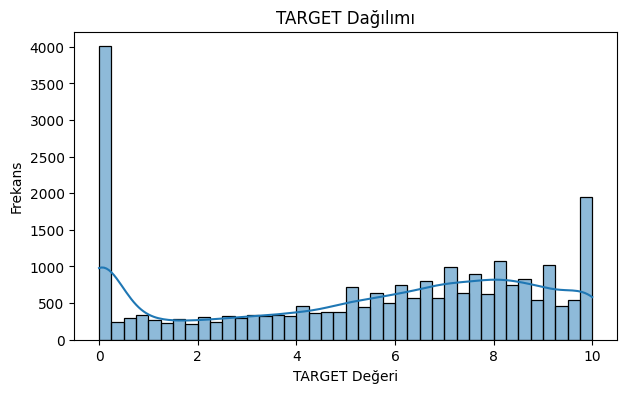

In [11]:
# TARGET Histogramı
plt.figure(figsize=(7,4))
sns.histplot(df["TARGET"], bins=40, kde=True)
plt.title("TARGET Dağılımı")
plt.xlabel("TARGET Değeri")
plt.ylabel("Frekans")
plt.show()

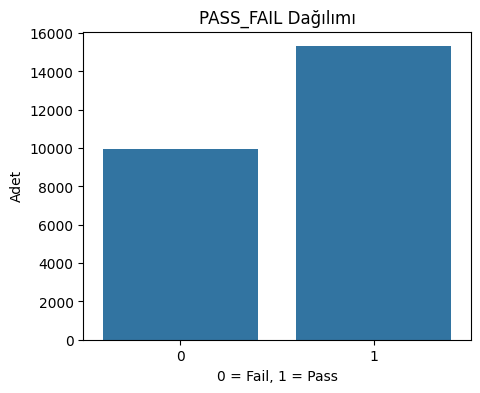

In [12]:
# PASS_FAIL Dağılımı
plt.figure(figsize=(5,4))
sns.countplot(x=df["PASS_FAIL"])
plt.title("PASS_FAIL Dağılımı")
plt.xlabel("0 = Fail, 1 = Pass")
plt.ylabel("Adet")
plt.show()

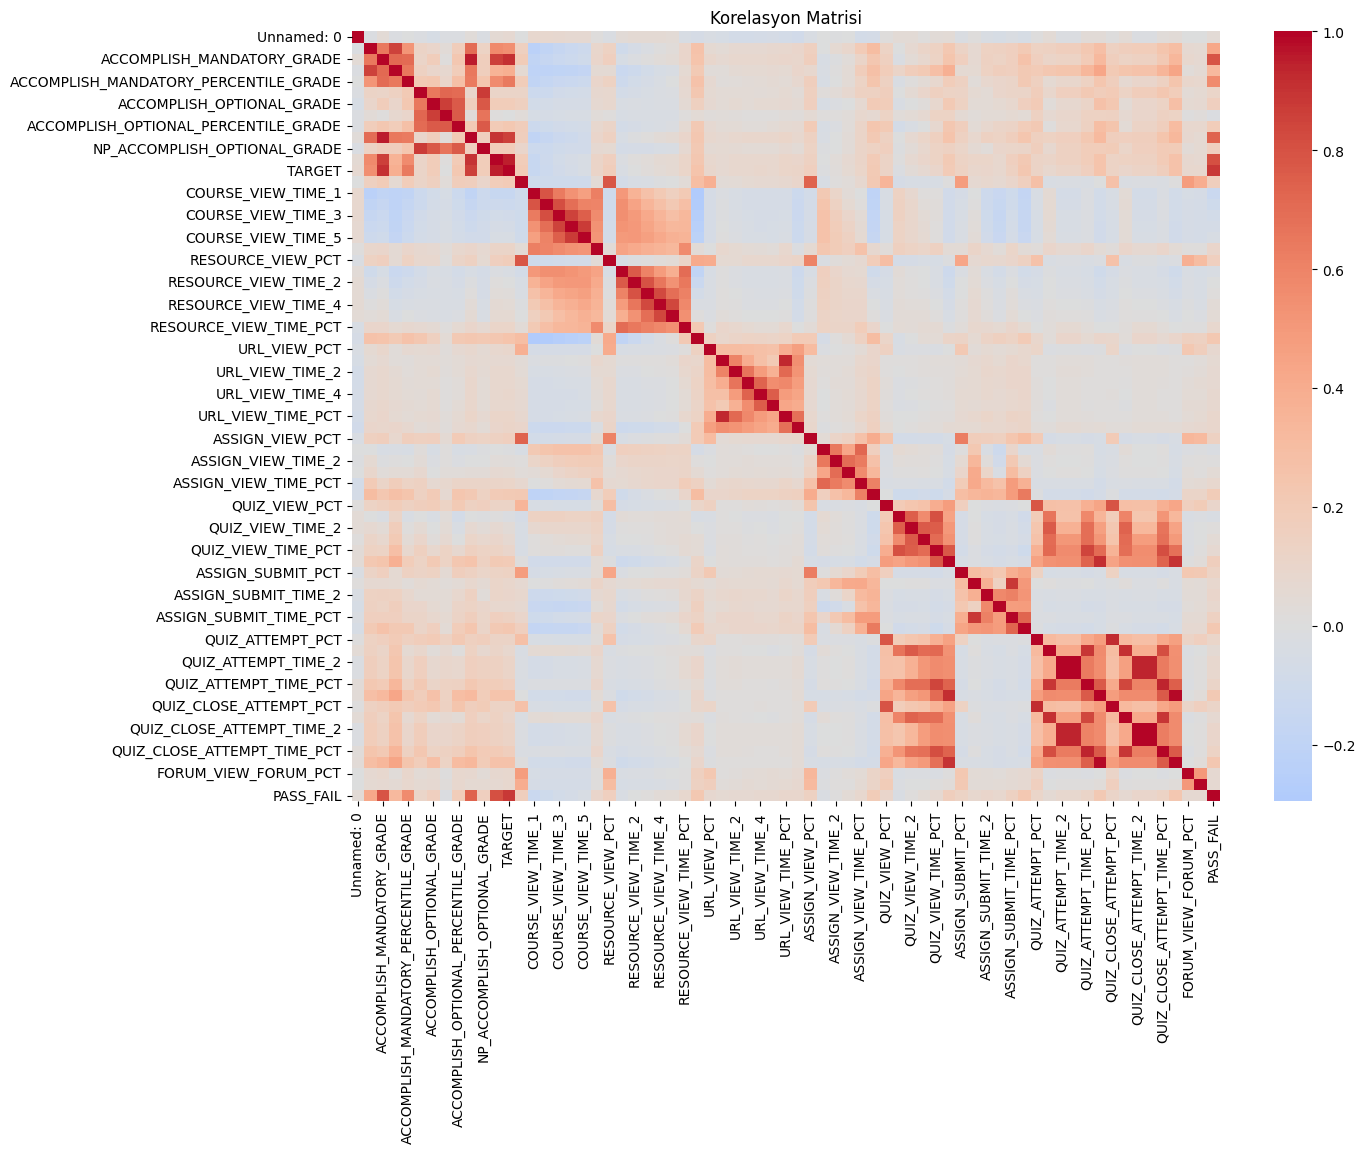

In [13]:
# Korelasyon Matrisi
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Korelasyon Matrisi")
plt.show()

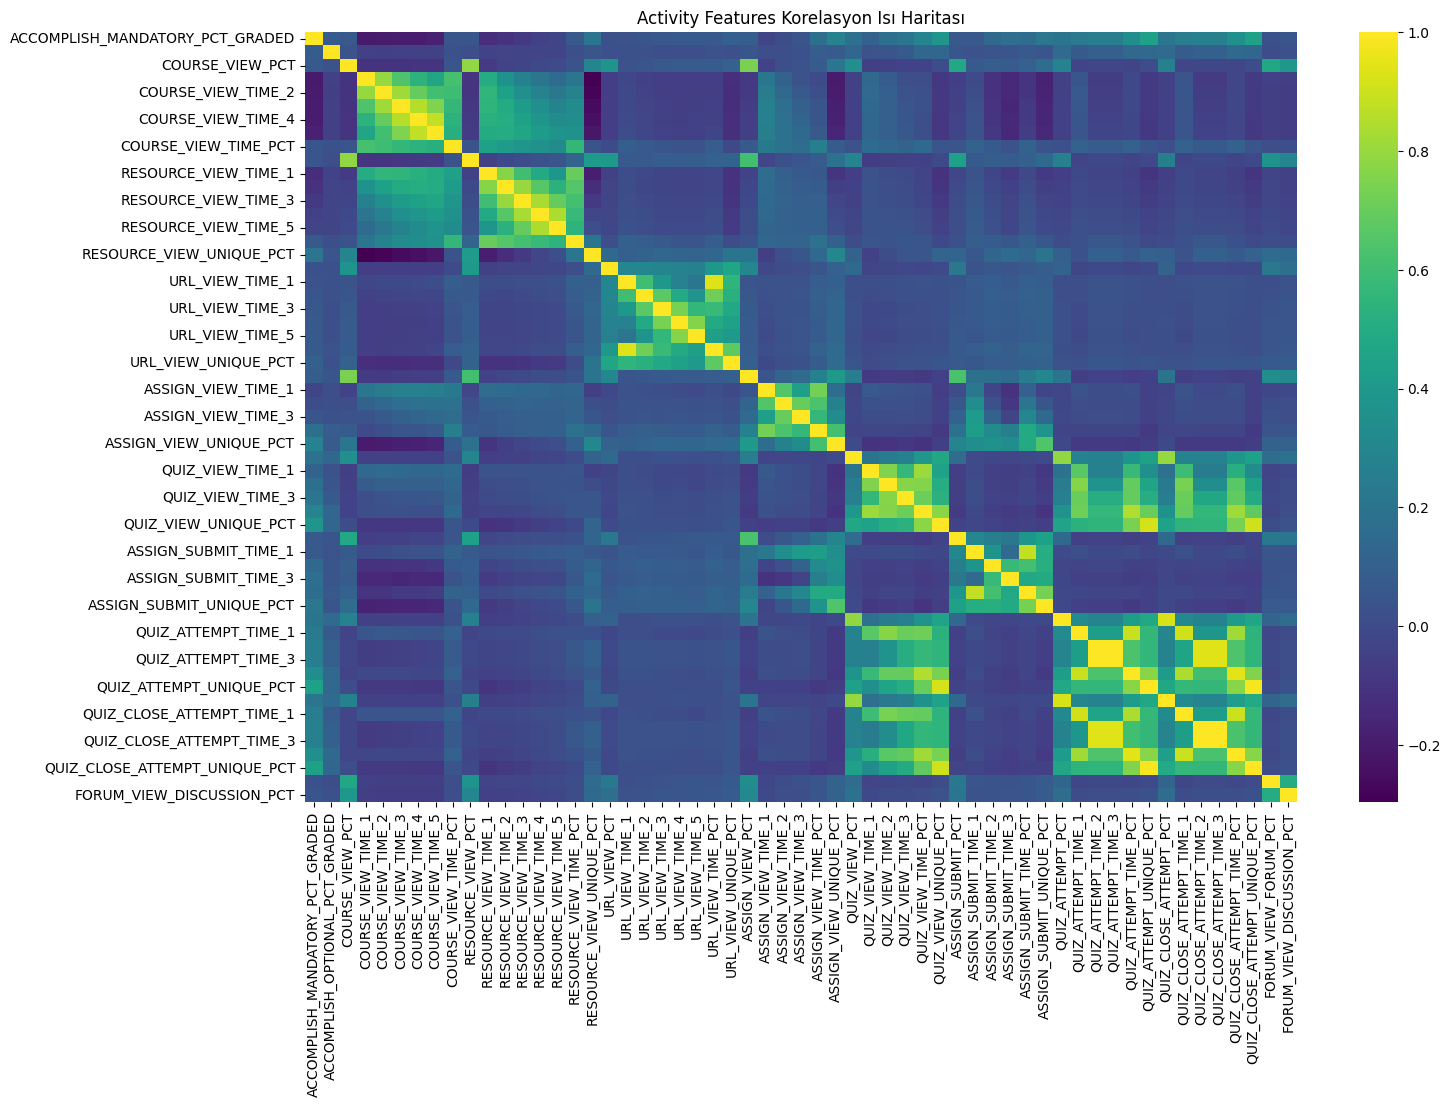

In [15]:
# Activity Heatmap
# (Aktivite kolonlarının korelasyonu)

activity_cols = [
    col for col in df.columns
    if any(key in col.lower() for key in ["time", "view", "pct", "attempt", "submit"])
]

plt.figure(figsize=(16,10))
sns.heatmap(df[activity_cols].corr(), cmap="viridis")
plt.title("Activity Features Korelasyon Isı Haritası")
plt.show()

TARGET histogram: Shows the overall distribution of student scores.

PASS/FAIL distribution: Used to check class balance in the dataset.

Correlation matrix: Reveals how strongly features are related to each other.


Activity heatmap: Visualizes relationships among LMS activity-based features.

TARGET histogramı: Notların genel dağılımını gösterir.

PASS/FAIL dağılımı: Sınıf dengesi analiz edilir.

Korelasyon matrisi: Değişkenler arası ilişki gücünü görmeye yarar.


Activity heatmap: LMS aktivitelerinin birbirleriyle ilişkisini gösterir.

In [16]:
# FEATURE ENGINEERING

# Binary target zaten oluşturuldu (PASS_FAIL)
# Ek olarak TARGET ≥ 8 olanlar için "HIGH_PERFORMER" etiketi ekleniyor
df["HIGH_PERFORMER"] = (df["TARGET"] >= 8).astype(int)

In [17]:
# Toplam Aktivite Skoru (tüm view/time/pct/attempt/submit kolonlarının toplamı)
activity_cols = [
    col for col in df.columns
    if any(k in col.lower() for k in ["view", "time", "pct", "attempt", "submit"])
]

df["TOTAL_ACTIVITY"] = df[activity_cols].sum(axis=1)

In [18]:
# Görüntüleme Oranı (Course view / Resource view)
# Öğrenci ders sayfasını kaynaklara göre ne kadar görüntülüyor?
if "COURSE_VIEW_PCT" in df.columns and "RESOURCE_VIEW_PCT" in df.columns:
    df["VIEW_RATIO"] = (
        df["COURSE_VIEW_PCT"] / (df["RESOURCE_VIEW_PCT"] + 1e-5)
    )

In [19]:
# Quiz Deneme Oranı (Quiz attempts / Quiz views)
# Öğrenci quiz sayfasını görüntülediğinde gerçekten deneyip denemediğini ölçer
if "QUIZ_ATTEMPT_PCT" in df.columns and "QUIZ_VIEW_PCT" in df.columns:
    df["ATTEMPT_RATIO"] = (
        df["QUIZ_ATTEMPT_PCT"] / (df["QUIZ_VIEW_PCT"] + 1e-5)
    )

In [20]:
# Toplam Harcanan Süre (tüm TIME kolonlarının toplamı)
time_cols = [col for col in df.columns if "TIME" in col.upper()]
df["TOTAL_TIME_SPENT"] = df[time_cols].sum(axis=1)

In [21]:
# Çok düşük varyansa sahip kolonları kaldırmak için (opsiyonel)
# Düşük varyans = modele katkısı düşük özellikler
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)

In [22]:
# Bazı kolonlar numerik olmayabileceği için try/except
try:
    selector.fit(df.select_dtypes(include=["float64","int64"]))
except:
    pass

df.shape

(25260, 74)

HIGH_PERFORMER creates an additional label for students scoring ≥ 8.

TOTAL_ACTIVITY summarizes all LMS activity to measure engagement.

VIEW_RATIO compares course-page engagement vs resource engagement.

ATTEMPT_RATIO measures how often quizzes are attempted relative to views.

TOTAL_TIME_SPENT gives a global measure of time spent in the platform.

Variance threshold removes features with no useful variation.

HIGH_PERFORMER, TARGET ≥ 8 olan öğrenciler için ek bir etiket oluşturur.

TOTAL_ACTIVITY, tüm LMS aktivitelerini özetleyerek öğrencinin etkileşim seviyesini gösterir.

VIEW_RATIO, ders sayfası görüntüleme oranı ile kaynak görüntüleme oranını karşılaştırır.

ATTEMPT_RATIO, öğrencinin quiz görüntülemeye göre ne kadar sık deneme yaptığını ölçer.

TOTAL_TIME_SPENT, platformda harcanan toplam süreyi gösterir.

Variance threshold, çok az değişkenlik gösteren ve modele katkısı düşük olan özellikleri kaldırır.

# Baseline Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Select features and target
X = df.drop(["PASS_FAIL", "TARGET"], axis=1)
y = df["PASS_FAIL"]


In [29]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [33]:
# Logistic Regression Baseline

logreg_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # fills remaining NaN
    ("scaler", StandardScaler()),                   # scaling for LR
    ("model", LogisticRegression(max_iter=500))
])

logreg_pipe.fit(X_train, y_train)
y_pred_logreg = logreg_pipe.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression
Accuracy: 0.9558590657165479
F1 Score: 0.9638163232192114
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1990
           1       0.96      0.97      0.96      3062

    accuracy                           0.96      5052
   macro avg       0.96      0.95      0.95      5052
weighted avg       0.96      0.96      0.96      5052



In [34]:
dt_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # DT also safer with no NaN
    ("model", DecisionTreeClassifier(random_state=42))
])

dt_pipe.fit(X_train, y_train)
y_pred_tree = dt_pipe.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 0.9578384798099763
F1 Score: 0.9651448208149239
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1990
           1       0.97      0.96      0.97      3062

    accuracy                           0.96      5052
   macro avg       0.96      0.96      0.96      5052
weighted avg       0.96      0.96      0.96      5052



# FEATURE SELECTION (CHI-SQUARE)

In [36]:
# FEATURE SELECTION (CHI-SQUARE)

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


# Önce tüm NaN'leri median ile dolduruyoruz
imputer_chi = SimpleImputer(strategy="median")
X_imputed = imputer_chi.fit_transform(X)

# Chi2 için veriyi 0-1 aralığına çekiyoruz (negatif kalmaz)
scaler_chi = MinMaxScaler()
X_scaled_chi = scaler_chi.fit_transform(X_imputed)

# Güvenlik: hala NaN/inf var mı kontrol et
print("NaN var mı?", np.isnan(X_scaled_chi).sum())
print("Inf var mı?", np.isinf(X_scaled_chi).sum())

# Chi-Square ile en iyi 20 özelliği seçiyoruz
selector = SelectKBest(score_func=chi2, k=20)
X_chi = selector.fit_transform(X_scaled_chi, y)

selected_features = X.columns[selector.get_support()]
print("Seçilen Chi-Square özellikleri:")
print(selected_features)

NaN var mı? 0
Inf var mı? 0
Seçilen Chi-Square özellikleri:
Index(['ACCOMPLISH_MANDATORY', 'ACCOMPLISH_MANDATORY_GRADE',
       'ACCOMPLISH_MANDATORY_PCT_GRADED',
       'ACCOMPLISH_MANDATORY_PERCENTILE_GRADE',
       'NP_ACCOMPLISH_MANDATORY_GRADE', 'NP_TARGET', 'COURSE_VIEW_TIME_1',
       'RESOURCE_VIEW_UNIQUE_PCT', 'URL_VIEW_UNIQUE_PCT',
       'ASSIGN_VIEW_UNIQUE_PCT', 'QUIZ_VIEW_UNIQUE_PCT',
       'ASSIGN_SUBMIT_TIME_PCT', 'ASSIGN_SUBMIT_UNIQUE_PCT',
       'QUIZ_ATTEMPT_TIME_PCT', 'QUIZ_ATTEMPT_UNIQUE_PCT',
       'QUIZ_CLOSE_ATTEMPT_TIME_2', 'QUIZ_CLOSE_ATTEMPT_TIME_3',
       'QUIZ_CLOSE_ATTEMPT_TIME_PCT', 'QUIZ_CLOSE_ATTEMPT_UNIQUE_PCT',
       'HIGH_PERFORMER'],
      dtype='object')


In [39]:
# PCA (BOYUT İNDİRGEME)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Eğer X_imputed hazırsa doğrudan kullan
# Hazır değilse burada median ile eksik değerleri dolduruyoruz
imputer_pca = SimpleImputer(strategy="median")
X_imputed_pca = imputer_pca.fit_transform(X)

# PCA için standartlaştırma gerekli (burada artık NaN yok)
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_imputed_pca)

print("NaN var mı?", np.isnan(X_scaled_pca).sum())
print("Inf var mı?", np.isinf(X_scaled_pca).sum())

# %95 varyansı koruyacak şekilde PCA bileşen sayısını otomatik seçiyoruz
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled_pca)

print("Orijinal boyut:", X.shape)
print("PCA boyutu:", X_pca.shape)
print("Açıklanan toplam varyans:", pca.explained_variance_ratio_.sum())


NaN var mı? 0
Inf var mı? 0
Orijinal boyut: (25260, 72)
PCA boyutu: (25260, 39)
Açıklanan toplam varyans: 0.95125453247014


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

results = []

def evaluate_model(model, X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([label, acc, f1])

# ORİJİNAL VERİYİ HAZIRLA (NaN yok + ölçekli)

# Eksik değerleri median ile doldur
imputer_orig = SimpleImputer(strategy="median")
X_imputed = imputer_orig.fit_transform(X)

# Standartlaştır (özellikle Logistic Regression için)
scaler_orig = StandardScaler()
X_scaled = scaler_orig.fit_transform(X_imputed)

# MODELLER

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression(max_iter=500)
tree = DecisionTreeClassifier(max_depth=8, random_state=42)

#  Original

evaluate_model(logreg, X_scaled, y, "LogReg (Original)")
evaluate_model(tree, X_scaled, y, "DecisionTree (Original)")


# Chi-Square
# (X_chi daha önce üretilmiş olmalı)

evaluate_model(logreg, X_chi, y, "LogReg (Chi-Square)")
evaluate_model(tree, X_chi, y, "DecisionTree (Chi-Square)")


# PCA
# (X_pca daha önce üretilmiş olmalı)

evaluate_model(logreg, X_pca, y, "LogReg (PCA)")
evaluate_model(tree, X_pca, y, "DecisionTree (PCA)")

# Sonuç Tablosu

import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "F1"])
df_results


,Model,Accuracy,F1
0,LogReg (Original),0.956057,0.963984
1,DecisionTree (Original),0.967736,0.973578
2,LogReg (Chi-Square),0.956453,0.964378
3,DecisionTree (Chi-Square),0.970111,0.975467
4,LogReg (PCA),0.933492,0.945701
5,DecisionTree (PCA),0.882621,0.904247
